1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step
Top predictions:
1. jean (10.25% confidence)
2. cellular_telephone (3.23% confidence)
3. power_drill (2.83% confidence)


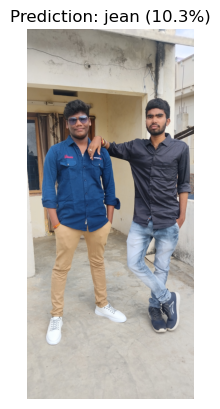

In [10]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the image
img_path = r"C:\Users\GuruKrishna Upputuri\Downloads\project videos\IMG_20240324_092457.jpg"
img = image.load_img(img_path, target_size=(224, 224))  # MobileNetV2 expects 224x224 RGB

# 2. Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = preprocess_input(img_array)        # Normalize for MobileNetV2

# 3. Load pre-trained model
model = MobileNetV2(weights='imagenet')

# 4. Predict and decode the results
preds = model.predict(img_array)
decoded_preds = decode_predictions(preds, top=3)[0]

# 5. Print results
print("Top predictions:")
for i, (imagenet_id, label, prob) in enumerate(decoded_preds):
    print(f"{i+1}. {label} ({prob:.2%} confidence)")

# 6. Show the image with label
plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.title(f"Prediction: {decoded_preds[0][1]} ({decoded_preds[0][2]*100:.1f}%)")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Top predictions:
1. water_bottle (76.98% confidence)
2. water_jug (6.10% confidence)
3. nipple (2.01% confidence)


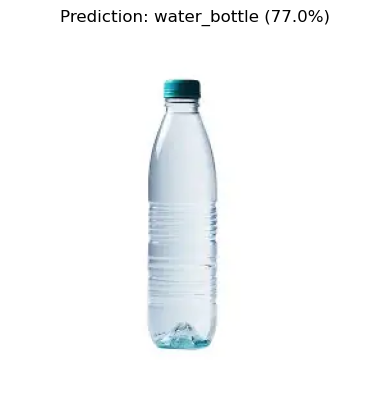

In [3]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the image
img_path = r"C:\Users\GuruKrishna Upputuri\Downloads\OIP.webp"
img = image.load_img(img_path, target_size=(224, 224))  # MobileNetV2 expects 224x224 RGB

# 2. Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = preprocess_input(img_array)        # Normalize for MobileNetV2

# 3. Load pre-trained model
model = MobileNetV2(weights='imagenet')

# 4. Predict and decode the results
preds = model.predict(img_array)
decoded_preds = decode_predictions(preds, top=3)[0]

# 5. Print results
print("Top predictions:")
for i, (imagenet_id, label, prob) in enumerate(decoded_preds):
    print(f"{i+1}. {label} ({prob:.2%} confidence)")

# 6. Show the image with label
plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.title(f"Prediction: {decoded_preds[0][1]} ({decoded_preds[0][2]*100:.1f}%)")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step
Top predictions:
1. kimono (16.48% confidence)
2. toyshop (15.77% confidence)
3. sombrero (13.34% confidence)


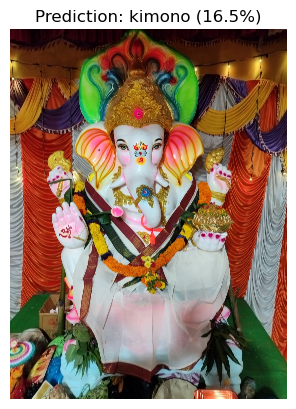

In [8]:
import cv2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# 1. Load a frame from the video
video_path = r"C:\Users\GuruKrishna Upputuri\Downloads\project videos\IMG_20240907_214712.jpg"
cap = cv2.VideoCapture(video_path)

success, frame = cap.read()  # Read the first frame
cap.release()

if not success:
    raise ValueError("Could not read video file.")

# Convert BGR (OpenCV) to RGB
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# 2. Preprocess the frame
frame_resized = cv2.resize(frame_rgb, (224, 224))  # Resize for MobileNetV2
img_array = image.img_to_array(frame_resized)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = preprocess_input(img_array)

# 3. Load pre-trained model
model = MobileNetV2(weights='imagenet')

# 4. Predict and decode the results
preds = model.predict(img_array)
decoded_preds = decode_predictions(preds, top=3)[0]

# 5. Print results
print("Top predictions:")
for i, (imagenet_id, label, prob) in enumerate(decoded_preds):
    print(f"{i+1}. {label} ({prob:.2%} confidence)")

# 6. Show the frame with label
plt.imshow(frame_rgb)
plt.axis('off')
plt.title(f"Prediction: {decoded_preds[0][1]} ({decoded_preds[0][2]*100:.1f}%)")
plt.show()


In [11]:
import cv2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
from collections import Counter

video_path = r"C:\Users\GuruKrishna Upputuri\Downloads\project videos\video demo.mp4"
cap = cv2.VideoCapture(video_path)

model = MobileNetV2(weights='imagenet')
frame_rate = 10  # Analyze every 10th frame
frame_count = 0
predictions = []

while True:
    success, frame = cap.read()
    if not success:
        break

    if frame_count % frame_rate == 0:
        # Convert and preprocess frame
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_resized = cv2.resize(frame_rgb, (224, 224))
        img_array = image.img_to_array(frame_resized)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        # Predict
        preds = model.predict(img_array)
        decoded = decode_predictions(preds, top=1)[0][0]
        predictions.append(decoded[1])  # Save label (e.g., "banana")

    frame_count += 1

cap.release()

# Count most common predictions
summary = Counter(predictions).most_common(5)
print("\nVideo Scene Summary:")
for label, count in summary:
    print(f"{label}: {count} frames")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 930ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━

In [14]:
import cv2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
from collections import Counter

# === CONFIG ===
video_path = r"C:\Users\GuruKrishna Upputuri\Downloads\GOD3.jpg"
frame_skip = 15  # Process every 15th frame

# === LOAD MODEL ===
model = MobileNetV2(weights='imagenet')

# === OPEN VIDEO ===
cap = cv2.VideoCapture(video_path)
frame_id = 0
concepts = []

while True:
    success, frame = cap.read()
    if not success:
        break

    if frame_id % frame_skip == 0:
        # Preprocess frame
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_resized = cv2.resize(frame_rgb, (224, 224))
        img_array = image.img_to_array(frame_resized)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        # Predict and decode
        preds = model.predict(img_array)
        top_pred = decode_predictions(preds, top=1)[0][0]
        concepts.append(top_pred[1])  # Get label only

    frame_id += 1

cap.release()

# === SUMMARIZE CONCEPTS ===
summary = Counter(concepts).most_common(5)

print("\n🔍 Video Concepts Summary:")
for label, count in summary:
    print(f"{label}: seen in {count} frames")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 865ms/step

🔍 Video Concepts Summary:
volcano: seen in 1 frames
